# Word2vec Vektör Görselleştime

In [98]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [64]:
model = Word2Vec.load("data/word2vec.model")

In [65]:
words = list(model.wv.index_to_key)
words[0:6]

['dil', 'doğal', 'işle', 'yapay', 'zeka', 'il']

In [66]:
df_name = []
df_count = []

for i in words:
    df_name.append(i)
    df_count.append(model.wv.get_vecattr(i,"count"))

df = pd.DataFrame({"name": df_name , "count" : df_count})
df.head()


,name,count
0,dil,962
1,doğal,822
2,işle,733
3,yapay,304
4,zeka,269


In [67]:
df.sort_values("count" , ascending=False).head()

,name,count
0,dil,962
1,doğal,822
2,işle,733
7,bu,687
6,iç,514


In [68]:
arr = np.empty((0 , 100) , dtype='f')
arr

array([], shape=(0, 100), dtype=float32)

In [69]:
word = "işle"

word_labels = [word]
word_labels

['işle']

In [70]:
close_words = model.wv.most_similar([word])
close_words

[('dil', 0.9991251230239868),
 ('iç', 0.9990182518959045),
 ('dah', 0.9988314509391785),
 ('doğal', 0.9987633228302002),
 ('bu', 0.9987300634384155),
 ('olarak', 0.9985607862472534),
 ('yapay', 0.998494565486908),
 ('zeka', 0.9984179139137268),
 ('il', 0.9984067678451538),
 ('ola', 0.9981984496116638)]

In [71]:
arr = np.append(arr , np.array([model.wv.get_vector(word)]), axis=0)
arr

array([[-9.06282961e-02,  1.82805330e-01,  5.35646565e-02,
         3.92634049e-02,  4.75540496e-02, -3.41945976e-01,
         1.55611992e-01,  4.68088359e-01, -1.87316746e-01,
        -1.81456119e-01, -1.23474695e-01, -3.50493670e-01,
        -4.54098992e-02,  1.96640804e-01,  6.91816509e-02,
        -1.43111095e-01,  5.88775165e-02, -1.55619964e-01,
        -1.49371438e-02, -4.86806124e-01,  1.26335517e-01,
         9.75841377e-03,  2.21197754e-01, -1.94932278e-02,
        -2.16506086e-02, -7.88606424e-03, -1.57411650e-01,
        -5.14958389e-02, -2.10119173e-01,  1.41602373e-02,
         2.45849565e-01,  2.42919084e-02,  8.97807702e-02,
        -2.81706959e-01, -9.18325707e-02,  2.71150470e-01,
        -2.37288401e-02, -1.71896785e-01, -1.79178298e-01,
        -4.41052228e-01,  4.10490185e-02, -1.70476049e-01,
        -9.21991840e-02,  6.61905184e-02,  2.37654507e-01,
        -8.75841156e-02, -2.21161649e-01, -4.12244201e-02,
         8.06855187e-02,  9.02431384e-02,  9.88231227e-0

In [72]:
for word_score in close_words:
    word_vector = model.wv.get_vector(word_score[0])
    word_labels.append(word_score[0])
    arr = np.append(arr , np.array([word_vector]) , axis=0)

In [73]:
arr

array([[-9.0628296e-02,  1.8280533e-01,  5.3564657e-02, ...,
        -2.8544512e-01,  6.1274081e-02,  2.6852582e-04],
       [-1.1917395e-01,  2.3529935e-01,  8.5746579e-02, ...,
        -3.8008252e-01,  6.8224274e-02,  1.7205227e-02],
       [-7.4637748e-02,  1.5837033e-01,  5.4443453e-02, ...,
        -2.6600429e-01,  4.4965260e-02,  1.2642424e-02],
       ...,
       [-7.6284193e-02,  1.3649368e-01,  3.8172949e-02, ...,
        -2.0821133e-01,  3.6038890e-02,  1.0573228e-02],
       [-7.8423008e-02,  1.3852224e-01,  4.5551870e-02, ...,
        -2.2715318e-01,  4.1886982e-02, -1.4013001e-03],
       [-5.6844115e-02,  9.2057489e-02,  3.2298248e-02, ...,
        -1.6998027e-01,  2.2807868e-02,  5.6354459e-03]], dtype=float32)

In [74]:
len(arr)

11

In [84]:
tsne = TSNE(n_components=2,perplexity=5, random_state=42)
np.printoptions(suppress=True)
Y = tsne.fit_transform(arr)

In [85]:
Y

array([[  43.495632 ,  109.258194 ],
       [  80.15298  ,  146.28151  ],
       [  41.425735 ,   62.905186 ],
       [ -47.59975  ,  -80.65973  ],
       [  74.83297  ,   90.23959  ],
       [ -12.37547  ,   -5.5142107],
       [ -35.60048  ,  -40.271633 ],
       [  22.995262 ,   24.308376 ],
       [  -4.860872 ,  -72.19607  ],
       [  13.726013 ,  -37.77301  ],
       [ -41.12091  , -129.43706  ]], dtype=float32)

In [90]:
x_cords = Y[:,0]
y_cords = Y[:,1]

In [91]:
word_labels

['işle',
 'dil',
 'iç',
 'dah',
 'doğal',
 'bu',
 'olarak',
 'yapay',
 'zeka',
 'il',
 'ola']

In [93]:
fig = px.scatter(x=x_cords.tolist() , y = y_cords.tolist(),text = word_labels , size_max = 100 )
fig.update_layout(height= 800 , title_text = "Word2vec Most Similarity")
fig.show()

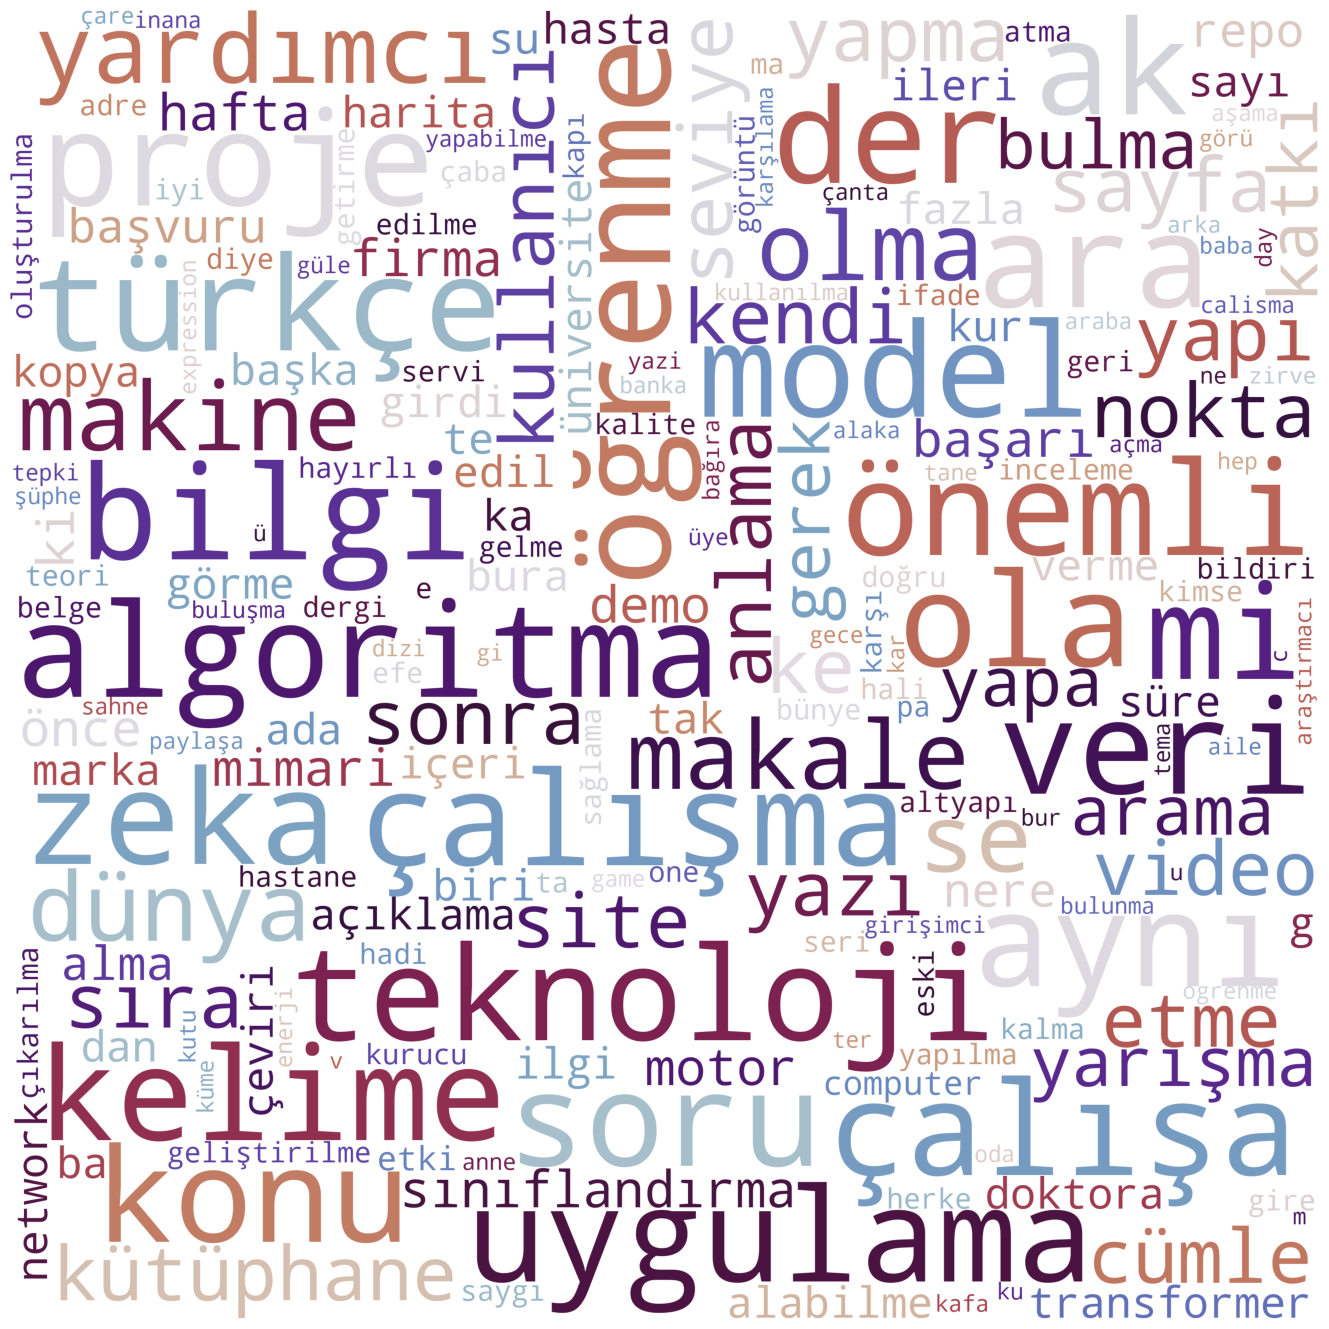

In [99]:
sentence = []
for i in words:
    sentence.append(i)

text = " ".join(map(str , sentence))
wordcloud = WordCloud(width = 3000 , height=3000 , max_font_size=300 , background_color="white" , colormap="twilight_shifted").generate(text)

plt.figure(figsize=(20,17))
plt.imshow(wordcloud , interpolation=None)
plt.axis("off")
plt.show()